In [1]:
suppressMessages ( library ( dplyr ) )
suppressMessages ( library ( ggplot2 ) )
options(dplyr.summarise.inform = FALSE)

**1.** Um estudo observacional caso-controle foi conduzido para investigar a associação entre a ocorrência de uma mutação e uma doença. Os dados coletados de duas populações são apresentados a seguir.
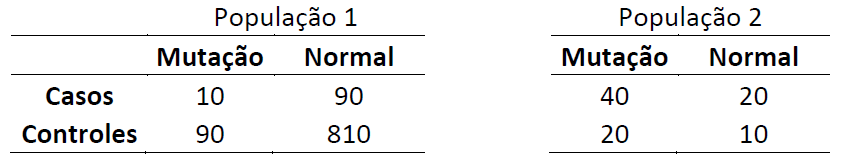

**a)** Calcule (à mão) a estatística razão de chances (OR: odds ratio) para cada população. Adote um modelo de regressão logística para analisar os dados de cada população. Obtenha o intervalo de confiança para o OR. Interprete.

In [2]:
# Construindo dataframe's por pop
# pop 1
pop1 = cbind ( c ( c ( rep ( "Casos" , 100 ) , rep ( "Controles" , 900 ) ) ) , c ( rep ( "Mutacao" , 10 ) , rep ( "Normal" , 90 ) , rep ( "Mutacao" , 90 ) , rep ( "Normal" , 810 ) ) )
pop1Df = pop1 %>% as.data.frame ( ) %>% rename ( "doenca" = "V1" , "status" = "V2" ) %>% mutate ( "Pop" = 1 )
# pop 2
pop2 = cbind ( c ( c ( rep ( "Casos" , 60 ) , rep ( "Controles" , 30 ) ) ) , c ( rep ( "Mutacao" , 40 ) , rep ( "Normal" , 20 ) , rep ( "Mutacao" , 20 ) , rep ( "Normal" , 10 ) ) )
pop2Df = pop2 %>% as.data.frame ( ) %>% rename ( "doenca" = "V1" , "status" = "V2" ) %>% mutate ( "Pop" = 2 )

# Juntando Dataframes
dfTot = rbind ( pop1Df , pop2Df )

In [3]:
# Construindo tabelas
tablePop1 = table ( dfTot [ dfTot$Pop == 1 , "doenca" ] , dfTot [ dfTot$Pop == 1 , "status" ] )
tablePop2 = table ( dfTot [ dfTot$Pop == 2 , "doenca" ] , dfTot [ dfTot$Pop == 2 , "status" ] )
# Checando se foram construídos corretamente
print ( tablePop1 )
print ( tablePop2 )

           
            Mutacao Normal
  Casos          10     90
  Controles      90    810
           
            Mutacao Normal
  Casos          40     20
  Controles      20     10


In [4]:
# Calculo manual
orPop1Manual = ( tablePop1 [ 1 , 1 ] / tablePop1 [ 2 , 1 ] ) / ( tablePop1 [ 1 , 2 ] / tablePop1 [ 2 , 2 ] )
orPop2Manual = ( tablePop2 [ 1 , 1 ] / tablePop2 [ 2 , 1 ] ) / ( tablePop2 [ 1 , 2 ] / tablePop2 [ 2 , 2 ] )

print ( paste ( "Temos que a OR para a população 1 é dada por:" , orPop1Manual ) )
print ( paste ( "Temos que a OR para a população 2 é dada por:" , orPop2Manual ) )

[1] "Temos que a OR para a população 1 é dada por: 1"
[1] "Temos que a OR para a população 2 é dada por: 1"


In [5]:
# Ajuste no dataframe
dfTot = dfTot %>% mutate ( resposta = ifelse ( doenca == "Casos" , 1 , 0 ) , status = relevel ( status , ref = "Normal" ) )

# Ajustes do modelo logístico
modeloPop1 = glm ( resposta ~ status , family = binomial ( link = "logit" ) , data = dfTot [ dfTot$Pop == 1 , ] )
modeloPop2 = glm ( resposta ~ status , family = binomial ( link = "logit" ) , data = dfTot [ dfTot$Pop == 2 , ] )

In [6]:
tabelaResumoPop1 = summary ( modeloPop1 )
print ( tabelaResumoPop1 )


Call:
glm(formula = resposta ~ status, family = binomial(link = "logit"), 
    data = dfTot[dfTot$Pop == 1, ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-0.459  -0.459  -0.459  -0.459   2.146  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.197e+00  1.111e-01  -19.78   <2e-16 ***
statusMutacao -1.248e-15  3.513e-01    0.00        1    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 650.17  on 999  degrees of freedom
Residual deviance: 650.17  on 998  degrees of freedom
AIC: 654.17

Number of Fisher Scoring iterations: 4



In [7]:
# Possibilidade - ja envolvendo conceito de contrastes
# pop1OrInf = exp ( modeloPop1$coefficients[2] - ( qnorm ( 0.975 ) * sqrt ( t( c ( 0 , 1 ) ) %*% vcov ( modeloPop1 ) %*% c ( 0 , 1 ) ) ) )
# pop1OrSup = exp ( modeloPop1$coefficients[2] + ( qnorm ( 0.975 ) * sqrt ( t( c ( 0 , 1 ) ) %*% vcov ( modeloPop1 ) %*% c ( 0 , 1 ) ) ) )

pop1OrInf = exp ( tabelaResumoPop1$coefficients[2,1] - ( qnorm ( 0.975 ) * tabelaResumoPop1$coefficients[2,2] ) )
pop1OrSup = exp ( tabelaResumoPop1$coefficients[2,1] + ( qnorm ( 0.975 ) * tabelaResumoPop1$coefficients[2,2] ) )

print ( paste0 ( "O intervalo de confiança para a OR da pop 1 é de [" , round ( pop1OrInf , 2 ) , ";" , round ( pop1OrSup , 2 ) , "]" ) )

[1] "O intervalo de confiança para a OR da pop 1 é de [0.5;1.99]"


In [8]:
tabelaResumoPop2 = summary ( modeloPop2 )
print ( tabelaResumoPop2 )


Call:
glm(formula = resposta ~ status, family = binomial(link = "logit"), 
    data = dfTot[dfTot$Pop == 2, ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4823  -1.4823   0.9005   0.9005   0.9005  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)   6.931e-01  3.873e-01    1.79   0.0735 .
statusMutacao 3.686e-16  4.743e-01    0.00   1.0000  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 114.57  on 89  degrees of freedom
Residual deviance: 114.57  on 88  degrees of freedom
AIC: 118.57

Number of Fisher Scoring iterations: 4



In [9]:
pop2OrInf = exp ( tabelaResumoPop2$coefficients[2,1] - ( qnorm ( 0.975 ) * tabelaResumoPop2$coefficients[2,2] ) )
pop2OrSup = exp ( tabelaResumoPop2$coefficients[2,1] + ( qnorm ( 0.975 ) * tabelaResumoPop2$coefficients[2,2] ) )

print ( paste0 ( "O intervalo de confiança para a OR da pop 2 é de [" , round ( pop2OrInf , 2 ) , ";" , round ( pop2OrSup , 2 ) , "]" ) )

[1] "O intervalo de confiança para a OR da pop 2 é de [0.39;2.53]"


**Conclusão:** Para ambas as populações, não rejeitamos a hipótese de que não há efeito de mutação sobre a razão de chances de se ter a doença. Isto é, não rejeitamos a hipótese de que indivíduos que tenham a mutação tenham uma chance maior se ter a doença ao se comparar com a chance de indivíduos que não a tenham, pois em ambos os casos, o intervalo de 95% de confiança incluir o valor 1 (chances iguais).

**b)** Some as correspondentes caselas de dados das duas populações e calcule (à mão) a estatística OR. Como em a), adote um modelo de regressão logística para analisar os dados. Obtenha o intervalo de confiança para o OR. Interprete.

In [10]:
# Tabela (desconsiderando pops)
tabelaTot = table ( dfTot$doenca , dfTot$status )
print ( tabelaTot )

           
            Normal Mutacao
  Casos        110      50
  Controles    820     110


In [11]:
# Calculo manual
orTotManual = ( tabelaTot [ 1 , 1 ] / tabelaTot [ 2 , 1 ] ) / ( tabelaTot [ 1 , 2 ] / tabelaTot [ 2 , 2 ] )

print ( paste ( "Temos que a OR para a população total é dada por:" , orTotManual ) )

[1] "Temos que a OR para a população total é dada por: 0.295121951219512"


In [12]:
modeloTot = glm ( resposta ~ status , family = binomial ( link = "logit" ) , data = dfTot )

tabelaResumoTot = summary ( modeloTot )
print ( tabelaResumoTot )


Call:
glm(formula = resposta ~ status, family = binomial(link = "logit"), 
    data = dfTot)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8657  -0.5018  -0.5018  -0.5018   2.0663  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.0088     0.1015 -19.784  < 2e-16 ***
statusMutacao   1.2204     0.1985   6.148 7.85e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 909.27  on 1089  degrees of freedom
Residual deviance: 874.83  on 1088  degrees of freedom
AIC: 878.83

Number of Fisher Scoring iterations: 4



In [13]:
popTotOrInf = exp ( tabelaResumoTot$coefficients[2,1] - ( qnorm ( 0.975 ) * tabelaResumoTot$coefficients[2,2] ) )
popTotOrSup = exp ( tabelaResumoTot$coefficients[2,1] + ( qnorm ( 0.975 ) * tabelaResumoTot$coefficients[2,2] ) )

print ( paste0 ( "O intervalo de confiança para a OR da pop tot é de [" , round ( popTotOrInf , 2 ) , ";" , round ( popTotOrSup , 2 ) , "]" ) )

[1] "O intervalo de confiança para a OR da pop tot é de [2.3;5]"


**Conclusão:** Analisando agora as duas populações conjuntamente, rejeitamos a hipótese de que não há efeito de mutação sobre a razão de chances de se ter a doença. Isto é, concluímos que indivíduos que tenham a mutação têm uma chance entre 2,3 e 5 vezes maior de ter a doença ao se comparar com indivíduos que não a tenham, considerando o intervalo de 95% de confiança.

**c)** Com base nos resultados obtidos em a) e b), use o Paradoxo de Simpson para explicar um possível efeito de confundimento que pode ocorrer em estudos de associação considerando dados estratificados desse tipo.

Quando o resultado de associação marginal possui uma direção diferente para cada associação condicional, temos o paradoxo de Simpson. No caso dos itens anteriores, observamos que não existia associação entre a doença e e a mutação observando as populações separadamente (associações condicionais). Porém, ao observarmos o resultado marginal (populações combinadas), obervamos a associação entre as covariáveis (conclusão na direção oposta).

**d)** Para realizar uma meta-análise destes dados, adote um modelo de regressão logística considerando os estratos populacionais como um fator sob estudo.

In [14]:
dfFin = dfTot %>% mutate ( Pop = as.factor ( Pop ) )
modeloCompleto = glm ( resposta ~ status + Pop , family = binomial ( link = "logit" ) , data = dfFin )

tabelaResumoCompleto = summary ( modeloCompleto )
print ( tabelaResumoCompleto )


Call:
glm(formula = resposta ~ status + Pop, family = binomial(link = "logit"), 
    data = dfFin)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.482  -0.459  -0.459  -0.459   2.146  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.197e+00  1.091e-01 -20.137   <2e-16 ***
statusMutacao -4.631e-15  2.823e-01   0.000        1    
Pop2           2.890e+00  2.945e-01   9.816   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 909.27  on 1089  degrees of freedom
Residual deviance: 764.74  on 1087  degrees of freedom
AIC: 770.74

Number of Fisher Scoring iterations: 4



In [15]:
statusOrInf = exp ( tabelaResumoCompleto$coefficients[2,1] - ( qnorm ( 0.975 ) * tabelaResumoCompleto$coefficients[2,2] ) )
statusOrSup = exp ( tabelaResumoCompleto$coefficients[2,1] + ( qnorm ( 0.975 ) * tabelaResumoCompleto$coefficients[2,2] ) )

popOrInf = exp ( tabelaResumoCompleto$coefficients[3,1] - ( qnorm ( 0.975 ) * tabelaResumoCompleto$coefficients[3,2] ) )
popOrSup = exp ( tabelaResumoCompleto$coefficients[3,1] + ( qnorm ( 0.975 ) * tabelaResumoCompleto$coefficients[3,2] ) )

print ( paste0 ( "O intervalo de confiança para a OR de mutação em relação normal é de [" , round ( statusOrInf , 2 ) , ";" , round ( statusOrSup , 2 ) , "]" ) )
print ( paste0 ( "O intervalo de confiança para a OR da pop 2 em relação a pop 1 é de [" , round ( popOrInf , 2 ) , ";" , round ( popOrSup , 2 ) , "]" ) )

[1] "O intervalo de confiança para a OR de mutação em relação normal é de [0.58;1.74]"
[1] "O intervalo de confiança para a OR da pop 2 em relação a pop 1 é de [10.11;32.06]"


**Conclusão:** não rejeitamos a hipótese de que indivíduos que tenham a mutação têm uma chance maior se ter a doença ao se comparar com a chance de indivíduos que não a tenham, pois o intervalo de 95% de confiança inclui o valor 1 (chances iguais). Porém, rejeitamos a hipótese de que não há efeitos de populações sobre a chance de se ter a doença. Estima-se que indivíduos da população 2 tenham uma chance entre 10,11 e 32,06 maior de se ter a doença ao se comparar com indivíduos da população 1 (levando-se em consideração o intervalo de confiança de 95%).

**2.** A tabela a seguir apresenta resultados de um estudo de associação de um SNP de interesse com uma doença. Para validação dos resultados do estudo também foram genotipados 20 marcadores considerados neutrais (isto é, que não estão associados com a doença e nem com o SNP sob estudo). As estatísticas Qui-quadrado (com 1 g.l.) da associação destes marcadores com a doença estão também apresentadas.
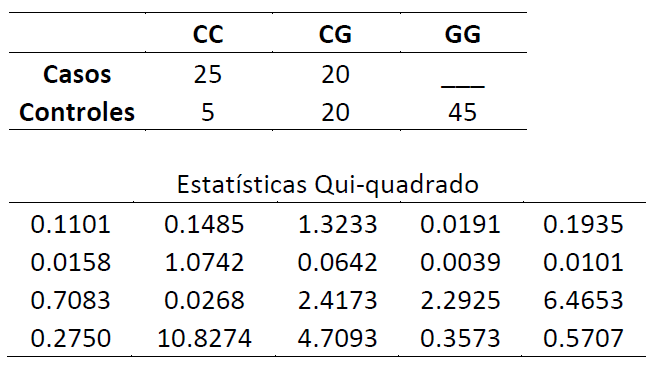

**a)** Preencha, a seu critério, a casela (casos, GG) com um valor de frequência. Realize um teste de associação do SNP com a doença com base na razão de chances (OR). Considere os seguintes casos: 2 graus de liberdade e 1 grau de liberdade (efeito linear do SNP). Interprete os resultados.

In [16]:
casosGG = 9

infoSnps = cbind ( c ( c ( rep ( "Casos" , 25+20+casosGG ) , rep ( "Controles" , 5+20+45 ) ) ) , c ( rep ( "CC" , 25 ) , rep ( "CG" , 20 ) , rep ( "GG" , casosGG ) , rep ( "CC" , 5 ) , rep ( "CG" , 20 ) , rep ( "GG" , 45 ) ) )
dfSnps = infoSnps %>% as.data.frame ( ) %>% rename ( "doenca" = "V1" , "snp" = "V2" )

table ( dfSnps$doenca , dfSnps$snp )

           
            CC CG GG
  Casos     25 20  9
  Controles  5 20 45

In [17]:
# caso com 2 g.l.
df2Graus = dfSnps %>% mutate ( snp = as.factor ( snp ) , resposta = ifelse ( doenca == "Casos" , 1 , 0 ) ) %>% mutate ( snp = relevel ( snp , ref = "CC" ) )

modelo2Graus = glm ( resposta ~ snp , family = binomial ( link = "logit" ) , data = df2Graus )

tabelaResumo2Graus = summary ( modelo2Graus )
print ( tabelaResumo2Graus )


Call:
glm(formula = resposta ~ snp, family = binomial(link = "logit"), 
    data = df2Graus)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8930  -0.6039  -0.6039   0.6039   1.8930  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.6094     0.4899   3.285  0.00102 ** 
snpCG        -1.6094     0.5831  -2.760  0.00578 ** 
snpGG        -3.2189     0.6110  -5.268 1.38e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 169.83  on 123  degrees of freedom
Residual deviance: 131.15  on 121  degrees of freedom
AIC: 137.15

Number of Fisher Scoring iterations: 3



In [18]:
snpCGInf2G = exp ( tabelaResumo2Graus$coefficients[2,1] - ( qnorm ( 0.975 ) * tabelaResumo2Graus$coefficients[2,2] ) )
snpCGSup2G = exp ( tabelaResumo2Graus$coefficients[2,1] + ( qnorm ( 0.975 ) * tabelaResumo2Graus$coefficients[2,2] ) )

snpGGInf2G = exp ( tabelaResumo2Graus$coefficients[3,1] - ( qnorm ( 0.975 ) * tabelaResumo2Graus$coefficients[3,2] ) )
snpGGSup2G = exp ( tabelaResumo2Graus$coefficients[3,1] + ( qnorm ( 0.975 ) * tabelaResumo2Graus$coefficients[3,2] ) )

print ( paste0 ( "A OR do genótipo CG em relação ao genótipo CC é: " , round ( exp ( tabelaResumo2Graus$coefficients[2,1] ) , 2 ) ) )
print ( paste0 ( "A OR do genótipo GG em relação ao genótipo CC é: " , round ( exp ( tabelaResumo2Graus$coefficients[3,1] ) , 2 ) ) )

print ( paste0 ( "O intervalo de confiança para a OR do genótipo CG em relação ao genótipo CC é de [" , round ( snpCGInf2G , 2 ) , ";" , round ( snpCGSup2G , 2 ) , "]" ) )
print ( paste0 ( "O intervalo de confiança para a OR do genótipo GG em relação ao genótipo CC é de [" , round ( snpGGInf2G , 2 ) , ";" , round ( snpGGSup2G , 2 ) , "]" ) )

[1] "A OR do genótipo CG em relação ao genótipo CC é: 0.2"
[1] "A OR do genótipo GG em relação ao genótipo CC é: 0.04"
[1] "O intervalo de confiança para a OR do genótipo CG em relação ao genótipo CC é de [0.06;0.63]"
[1] "O intervalo de confiança para a OR do genótipo GG em relação ao genótipo CC é de [0.01;0.13]"


In [19]:
df1Grau = dfSnps %>% mutate ( qtG = ifelse ( snp == "CC" , 0 , ifelse ( snp == "CG" , 1 , 2 ) ) , resposta = ifelse ( doenca == "Casos" , 1 , 0 ) )

modelo1Grau = glm ( resposta ~ qtG , family = binomial ( link = "logit" ) , data = df1Grau )

tabelaResumo1Grau = summary ( modelo1Grau )
print ( tabelaResumo1Grau )


Call:
glm(formula = resposta ~ qtG, family = binomial(link = "logit"), 
    data = df1Grau)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8930  -0.6039  -0.6039   0.6039   1.8930  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.6094     0.4068   3.956 7.62e-05 ***
qtG          -1.6094     0.2994  -5.375 7.65e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 169.83  on 123  degrees of freedom
Residual deviance: 131.15  on 122  degrees of freedom
AIC: 135.15

Number of Fisher Scoring iterations: 3



In [20]:
snpCGInf1G = exp ( tabelaResumo1Grau$coefficients[2,1] - ( qnorm ( 0.975 ) * tabelaResumo1Grau$coefficients[2,2] ) )
snpCGSup1G = exp ( tabelaResumo1Grau$coefficients[2,1] + ( qnorm ( 0.975 ) * tabelaResumo1Grau$coefficients[2,2] ) )

snpGGInf1G = exp ( 2 * tabelaResumo1Grau$coefficients[2,1] - ( qnorm ( 0.975 ) * 2 * tabelaResumo1Grau$coefficients[2,2] ) )
snpGGSup1G = exp ( 2 * tabelaResumo1Grau$coefficients[2,1] + ( qnorm ( 0.975 ) * 2 * tabelaResumo1Grau$coefficients[2,2] ) )

print ( paste0 ( "A OR do genótipo CG em relação ao genótipo CC é: " , round ( exp ( tabelaResumo1Grau$coefficients[2,1] ) , 2 ) ) )
print ( paste0 ( "A OR do genótipo GG em relação ao genótipo CC é: " , round ( exp ( 2 * tabelaResumo1Grau$coefficients[2,1] ) , 2 ) ) )

print ( paste0 ( "O intervalo de confiança para a OR do genótipo CG em relação ao genótipo CC é de [" , round ( snpCGInf1G , 2 ) , ";" , round ( snpCGSup1G , 2 ) , "]" ) )
print ( paste0 ( "O intervalo de confiança para a OR do genótipo GG em relação ao genótipo CC é de [" , round ( snpGGInf1G , 2 ) , ";" , round ( snpGGSup1G , 2 ) , "]" ) )

[1] "A OR do genótipo CG em relação ao genótipo CC é: 0.2"
[1] "A OR do genótipo GG em relação ao genótipo CC é: 0.04"
[1] "O intervalo de confiança para a OR do genótipo CG em relação ao genótipo CC é de [0.11;0.36]"
[1] "O intervalo de confiança para a OR do genótipo GG em relação ao genótipo CC é de [0.01;0.13]"


**Conclusão:** Em ambos os modelos, há efeito estatisticamente significante de associação do SNP com a doença. No modelo com 2 graus de liberdade, estimamos a OR da doença para os genótipos CG e GG em relação a CC, que resultou em 0,2 e 0,04 respectivamente. Neste cenário, o intervalo de 95% de confiança para a primeira OR é $[0,06 ; 0,63]$, e o da segunda é dado por $[0,01 ; 0,13]$. Isto é, a chance de um indivíduo de genótipo CG ter a doença é entre 6% e 63% da chance de um indivíduo cujo genótipo é CC. Já a chance de um indivíduo de genótipo GG ter a doença é entre 1% e 13% da chance de um indivíduo cujo genótipo é CC.

Já no modelo com efeito linear de SNP (1 grau de liberdade), temos que o parâmetro estimado $\beta$ trata-se do acréscimo no log da OR em relação ao genótipo CC esperado para cada alelo G acrescentado no genótipo do indivíduo. A OR em relação ao genótipo CC para este modelo coincide com o modelo anterior (0,2 e 0,04 para os genótipos CG e GG) apesar da mudança de interpretação do coeficiente estimado. Para este modelo, os intervalos de confiança calculados para a OR de se ter a doença dos genótipos CG e GG em relação ao CC são dados respectivamente por $[0,11;0,36]$ e $[0,01;0,13]$. A interpretação segue da mesma forma como a anterior.

**Observação:** Repare que no caso acima, o ajuste dos modelos com 1 e com 2 graus de liberdade resultaram nas mesmas estimativas para as OR. Porém este fenômeno nem sempre ocorre, e por isto segue o contraexemplo, ilustrando outro cenário.

In [21]:
casosGG2 = 25

infoSnps2 = cbind ( c ( c ( rep ( "Casos" , 25+20+casosGG2 ) , rep ( "Controles" , 5+20+45 ) ) ) , c ( rep ( "CC" , 25 ) , rep ( "CG" , 20 ) , rep ( "GG" , casosGG2 ) , rep ( "CC" , 5 ) , rep ( "CG" , 20 ) , rep ( "GG" , 45 ) ) )
dfSnps2 = infoSnps2 %>% as.data.frame ( ) %>% rename ( "doenca" = "V1" , "snp" = "V2" )

table ( dfSnps2$doenca , dfSnps2$snp )

           
            CC CG GG
  Casos     25 20 25
  Controles  5 20 45

In [22]:
# caso com 2 g.l.
df2Graus2 = dfSnps2 %>% mutate ( snp = as.factor ( snp ) , resposta = ifelse ( doenca == "Casos" , 1 , 0 ) ) %>% mutate ( snp = relevel ( snp , ref = "CC" ) )

modelo2Graus2 = glm ( resposta ~ snp , family = binomial ( link = "logit" ) , data = df2Graus2 )

tabelaResumo2Graus2 = summary ( modelo2Graus2 )
print ( tabelaResumo2Graus2 )


Call:
glm(formula = resposta ~ snp, family = binomial(link = "logit"), 
    data = df2Graus2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8930  -0.9400  -0.1681   1.1774   1.4350  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.6094     0.4899   3.285  0.00102 ** 
snpCG        -1.6094     0.5831  -2.760  0.00578 ** 
snpGG        -2.1972     0.5497  -3.997 6.42e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 194.08  on 139  degrees of freedom
Residual deviance: 173.73  on 137  degrees of freedom
AIC: 179.73

Number of Fisher Scoring iterations: 4



In [23]:
snpCGInf2G2 = exp ( tabelaResumo2Graus2$coefficients[2,1] - ( qnorm ( 0.975 ) * tabelaResumo2Graus2$coefficients[2,2] ) )
snpCGSup2G2 = exp ( tabelaResumo2Graus2$coefficients[2,1] + ( qnorm ( 0.975 ) * tabelaResumo2Graus2$coefficients[2,2] ) )

snpGGInf2G2 = exp ( tabelaResumo2Graus2$coefficients[3,1] - ( qnorm ( 0.975 ) * tabelaResumo2Graus2$coefficients[3,2] ) )
snpGGSup2G2 = exp ( tabelaResumo2Graus2$coefficients[3,1] + ( qnorm ( 0.975 ) * tabelaResumo2Graus2$coefficients[3,2] ) )

print ( paste0 ( "A OR do genótipo CG em relação ao genótipo CC é: " , round ( exp ( tabelaResumo2Graus2$coefficients[2,1] ) , 2 ) ) )
print ( paste0 ( "A OR do genótipo GG em relação ao genótipo CC é: " , round ( exp ( tabelaResumo2Graus2$coefficients[3,1] ) , 2 ) ) )

print ( paste0 ( "O intervalo de confiança para a OR do genótipo CG em relação ao genótipo CC é de [" , round ( snpCGInf2G2 , 2 ) , ";" , round ( snpCGSup2G2 , 2 ) , "]" ) )
print ( paste0 ( "O intervalo de confiança para a OR do genótipo GG em relação ao genótipo CC é de [" , round ( snpGGInf2G2 , 2 ) , ";" , round ( snpGGSup2G2 , 2 ) , "]" ) )

[1] "A OR do genótipo CG em relação ao genótipo CC é: 0.2"
[1] "A OR do genótipo GG em relação ao genótipo CC é: 0.11"
[1] "O intervalo de confiança para a OR do genótipo CG em relação ao genótipo CC é de [0.06;0.63]"
[1] "O intervalo de confiança para a OR do genótipo GG em relação ao genótipo CC é de [0.04;0.33]"


In [24]:
df1Grau2 = dfSnps2 %>% mutate ( qtG = ifelse ( snp == "CC" , 0 , ifelse ( snp == "CG" , 1 , 2 ) ) , resposta = ifelse ( doenca == "Casos" , 1 , 0 ) )

modelo1Grau2 = glm ( resposta ~ qtG , family = binomial ( link = "logit" ) , data = df1Grau2 )

tabelaResumo1Grau2 = summary ( modelo1Grau2 )
print ( tabelaResumo1Grau2 )


Call:
glm(formula = resposta ~ qtG, family = binomial(link = "logit"), 
    data = df1Grau2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7492  -0.9045  -0.1029   1.0523   1.4774  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.2857     0.3726   3.451 0.000559 ***
qtG          -0.9840     0.2420  -4.065 4.79e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 194.08  on 139  degrees of freedom
Residual deviance: 175.25  on 138  degrees of freedom
AIC: 179.25

Number of Fisher Scoring iterations: 4



In [25]:
snpCGInf1G2 = exp ( tabelaResumo1Grau2$coefficients[2,1] - ( qnorm ( 0.975 ) * tabelaResumo1Grau2$coefficients[2,2] ) )
snpCGSup1G2 = exp ( tabelaResumo1Grau2$coefficients[2,1] + ( qnorm ( 0.975 ) * tabelaResumo1Grau2$coefficients[2,2] ) )

snpGGInf1G2 = exp ( 2 * tabelaResumo1Grau2$coefficients[2,1] - ( qnorm ( 0.975 ) * 2 * tabelaResumo1Grau2$coefficients[2,2] ) )
snpGGSup1G2 = exp ( 2 * tabelaResumo1Grau2$coefficients[2,1] + ( qnorm ( 0.975 ) * 2 * tabelaResumo1Grau2$coefficients[2,2] ) )

print ( paste0 ( "A OR do genótipo CG em relação ao genótipo CC é: " , round ( exp ( tabelaResumo1Grau2$coefficients[2,1] ) , 2 ) ) )
print ( paste0 ( "A OR do genótipo GG em relação ao genótipo CC é: " , round ( exp ( 2 * tabelaResumo1Grau2$coefficients[2,1] ) , 2 ) ) )

print ( paste0 ( "O intervalo de confiança para a OR do genótipo CG em relação ao genótipo CC é de [" , round ( snpCGInf1G2 , 2 ) , ";" , round ( snpCGSup1G2 , 2 ) , "]" ) )
print ( paste0 ( "O intervalo de confiança para a OR do genótipo GG em relação ao genótipo CC é de [" , round ( snpGGInf1G2 , 2 ) , ";" , round ( snpGGSup1G2 , 2 ) , "]" ) )

[1] "A OR do genótipo CG em relação ao genótipo CC é: 0.37"
[1] "A OR do genótipo GG em relação ao genótipo CC é: 0.14"
[1] "O intervalo de confiança para a OR do genótipo CG em relação ao genótipo CC é de [0.23;0.6]"
[1] "O intervalo de confiança para a OR do genótipo GG em relação ao genótipo CC é de [0.05;0.36]"


**Conclusão:** Em ambos os modelos, há efeito estatisticamente significante de associação do SNP com a doença. No modelo com 2 graus de liberdade, estimamos a OR da doença para os genótipos CG e GG em relação a CC, que resultou em 0,2 e 0,11 respectivamente. Neste cenário, o intervalo de 95% de confiança para a primeira OR é $[0,06 ; 0,63]$, e o da segunda é dado por $[0,04 ; 0,33]$. Isto é, a chance de um indivíduo de genótipo CG ter a doença é entre 6% e 63% da chance de um indivíduo cujo genótipo é CC. Já a chance de um indivíduo de genótipo GG ter a doença é entre 4% e 33% da chance de um indivíduo cujo genótipo é CC.

Já no modelo com efeito linear de SNP (1 grau de liberdade), temos que o parâmetro estimado $\beta$ trata-se do acréscimo no log da OR em relação ao genótipo CC esperado para cada alelo G acrescentado no genótipo do indivíduo. A OR em relação ao genótipo CC para este modelo **não** coincide com o modelo anterior, sendo 0,37 e 0,14 para os genótipos CG e GG, respectivamente. Para este modelo, os intervalos de confiança calculados para a OR de se ter a doença dos genótipos CG e GG em relação ao CC são dados respectivamente por $[0,23;0,60]$ e $[0,05;0,36]$. A interpretação segue da mesma forma como a anterior.

**b)** Use a informação dos marcadores neutrais para validação dos resultados do estudo. Para
isso, considere os seguintes procedimentos:
- Pritchard e Rosenberg (1999) propuseram o uso de marcadores neutrais para construir um
teste da inexistência de confundimento devido à estrutura de população (hipótese H0).
Considerando os testes de associação de cada um de L marcadores neutrais obtém-se a
estatística
<center>
$\chi^2_p = \chi^2_{M1} + \chi^2_{M2} + ... + \chi^2_{ML}$
</center>
cuja significância é verificada com base na distribuição Qui-quadrado com L graus de
liberdade. Se não houver indicação de estrutura de população por este teste, a associação com
o gene candidato deve ser considerada válida.
- Devlin e Roeder (1999) propuseram corrigir a estatística Qui-quadrado do gene candidato (digamos, $\chi^2_c$) dividindo por um fator de inflação, tal que:
<center>
$\chi^2_{GC} = \frac{\chi^2_c}{max\{\hat{\lambda} , 1\}}; \hat{\lambda} = \frac{mediana(\chi^2_{M1},...,\chi^2_{ML})}{0.4549}$
</center>
O valor 0.4549 corresponde ao quantil 50% da distribuição Qui-quadrado com 1 g.l. Os L
marcadores são denominados neutrais ou de controle genômico (GC). A associação do gene
candidato é então testada avaliando a significância da estatística corrigida, $\chi^2_{GC}$, na distribuição Qui-quadrado com 1 g.l.

In [26]:
# valores Dados
chiQuadrados = c ( 0.1101,0.1485,1.3233,0.0191,0.1935,0.0158,1.0742,0.0642,0.0039,0.0101,0.7083,0.0268,2.4173,2.2925,6.4653,0.2750,10.8274,4.7093,0.3573, 0.5707 )

# Primeiro criterio
valorSoma = sum(chiQuadrados)
print ( "Primeiro critério:" )
print ( paste0 ( "O valor da soma das estatísticas Qui-quadrado dos marcadores é dada por " , round ( valorSoma , 2 ) ) )
print ( paste0 ( "Considerando 95% de confiança, temos que o intervalo de não rejeição de H0 é dado por [" , round ( qchisq ( 0.025 , df = length ( chiQuadrados ) ) , 2 ) , "," , round ( qchisq ( 0.975 , df = length ( chiQuadrados ) ) , 2 ) , "]" ) )

# Segundo criterio
lambdaHat = quantile ( chiQuadrados , .5 )[[1]] / qchisq ( .5 , 1)
fatorCorrecao = max ( 1 , lambdaHat )
print ( "Segundo critério:" )
print ( paste0 ( "O fator de correção é dado por: " , fatorCorrecao ) )

# Modelo 2 g.l.
print ( "Para o modelo com 2 graus de liberdade:" )
probCorrigidaBetaCG = 1 - pchisq ( ( tabelaResumo2Graus$coefficients[2,3] ^ 2)/fatorCorrecao  , df = 1 )
print ( paste0 ( "O nível descritivo do teste é: " , probCorrigidaBetaCG ) )

probCorrigidaBetaGG = 1 - pchisq ( ( tabelaResumo2Graus$coefficients[3,3] ^ 2)/fatorCorrecao  , df = 1 )
print ( paste0 ( "O nível descritivo do teste é: " , probCorrigidaBetaGG  ) )

# Modelo 1 g.l.
print ( "Para o modelo com 1 grau de liberdade:" )
probCorrigidaBeta = 1 - pchisq ( ( tabelaResumo1Grau$coefficients[2,3] ^ 2)/fatorCorrecao  , df = 1 )
print ( paste0 ( "O nível descritivo do teste é: " , probCorrigidaBeta ) )

[1] "Primeiro critério:"
[1] "O valor da soma das estatísticas Qui-quadrado dos marcadores é dada por 31.61"
[1] "Considerando 95% de confiança, temos que o intervalo de não rejeição de H0 é dado por [9.59,34.17]"
[1] "Segundo critério:"
[1] "O fator de correção é dado por: 1"
[1] "Para o modelo com 2 graus de liberdade:"
[1] "O nível descritivo do teste é: 0.00577670687294218"
[1] "O nível descritivo do teste é: 1.37764214813707e-07"
[1] "Para o modelo com 1 grau de liberdade:"
[1] "O nível descritivo do teste é: 7.65050465201256e-08"


**Conclusão:** Pela primeira abordagem, concluímos que não há indícios de subestrutura de população (pois a estatística observada 31,61 pertence à região de não rejeição de $H_0$). Logo, se validam as conclusões já feitas a respeito da relação do gene com a doença.
Pela segunda abordagem, temos que não houve correção, pois $\hat{\lambda} < 1$. Logo, as conclusões permanecem as mesmas também, como esperado.

**3.** Condidere os dados do GAW16 (Genetic Analysis Workshop 16) disponíveis no edisciplinas.
O arquivo “phen.txt” contém informações fenotípicas de 2062 indivíduos classificados de
acordo com o diagnóstico de artrite reumatóide, sendo 868 cases (Affection=1) e 1194
controles (Affection=0). Para esses mesmos indivíduos, os arquivos “gene6.6.txt,
gene6.7.txt, gene6.8.txt, gene6.9.txt e gene6.10.txt” contêm genótipos de
SNPs no cromossomo 6, em que 0, 1 e 2 correspondem ao número de cópias de um alelo alvo.

**a)** Realize uma análise de associação de cada SNP com a doença (casos e controles). Adote
um modelo de regressão logística. Apresente os resultados em um gráfico Manhattan e em um
gráfico Vulcão. Há SNPs significantes?

In [27]:
gen = read.table ( "~/Monitoria/Dados/gen6.6.txt" , sep = "," , header = T, quote = '"')

for ( indice in 7:10 ){
    
    baseAux = read.table ( paste0 ( "~/Monitoria/Dados/gen6.", indice ,".txt" ) , sep = "," , header = T, quote = '"')
    gen = cbind ( gen , baseAux )
    
}


phen = read.table ( "~/Monitoria/Dados/phen.txt" , sep = "," , header = T )
head ( gen , 5 )
head ( phen , 5 )

,rs1033955,rs17658803,rs13196368,rs834362,rs10484378,rs12529004,rs986759,rs834372,rs834370,rs634162,...,rs16890428,rs10807192,rs742538,rs10456462,rs13206817,rs1931765,rs12214213,rs4299828,rs12176364,rs6458047
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,1,1,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,1,0,0,...,0,2,0,0,2,0,2,0,0,0
3,2,0,0,2,0,0,2,0,1,0,...,0,1,1,0,2,0,2,0,0,0
4,1,0,1,1,0,0,1,0,1,0,...,0,1,0,1,0,1,0,NA,0,1
5,1,0,1,1,0,0,1,0,1,0,...,0,1,1,1,1,0,1,0,0,0


,ID,Affection,Sex,DRB1_1,DRB1_2,SENum,SEStatus,AntiCCP,RFUW,DRB
,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>
1,D0024949,0,F,0,1,2,yes,NA,NA,1
2,D0024302,0,F,0,0,1,yes,NA,NA,0
3,D0023151,0,F,0,0,1,yes,NA,NA,0
4,D0022042,0,F,0,0,1,yes,NA,NA,0
5,D0021275,0,F,0,0,1,yes,NA,NA,0


In [28]:
gen$ID2 = 1:nrow ( gen )
phen$ID2 = 1:nrow ( phen )
mergeDf = merge ( phen , gen , by = "ID2" )
head ( mergeDf )

,ID2,ID,Affection,Sex,DRB1_1,DRB1_2,SENum,SEStatus,AntiCCP,RFUW,...,rs16890428,rs10807192,rs742538,rs10456462,rs13206817,rs1931765,rs12214213,rs4299828,rs12176364,rs6458047
,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,D0024949,0,F,0,1,2,yes,NA,NA,...,1,0,1,1,0,0,0,0,0,0
2,2,D0024302,0,F,0,0,1,yes,NA,NA,...,0,2,0,0,2,0,2,0,0,0
3,3,D0023151,0,F,0,0,1,yes,NA,NA,...,0,1,1,0,2,0,2,0,0,0
4,4,D0022042,0,F,0,0,1,yes,NA,NA,...,0,1,0,1,0,1,0,NA,0,1
5,5,D0021275,0,F,0,0,1,yes,NA,NA,...,0,1,1,1,1,0,1,0,0,0
6,6,D0021163,0,F,0,0,1,yes,NA,NA,...,0,2,0,0,1,1,1,1,0,1


In [29]:
snpNames = colnames ( gen ) [ colnames ( gen ) != "ID2" ]
infoRelevante = NULL

for ( snp in snpNames ){
    
# Modelo aditivo
    mergeFilt = mergeDf [ !(is.na ( mergeDf$Affection ) ) & !( is.na ( mergeDf[ , snp ] ) ) ,  ]
    modeloAdit = glm ( mergeFilt$Affection ~ mergeFilt[ , snp ] , family = binomial ( link = "logit" ) )
    tabelaResumoAdit = summary ( modeloAdit )
    
    infoRelevante = rbind ( infoRelevante , c ( snp , tabelaResumoAdit$coefficients[ 2 , 1 ] , tabelaResumoAdit$coefficients[ 2 , 4 ] ) )
    
}
infosDf = infoRelevante %>% as.data.frame ( )
infosDf %>% head ( 5 )

,V1,V2,V3
,<fct>,<fct>,<fct>
1,rs1033955,-0.141979821205053,0.0306058477522889
2,rs17658803,-0.122276762182379,0.226015904048075
3,rs13196368,0.179610020090004,0.00539406162568879
4,rs834362,-0.188233415374488,0.00623558272950267
5,rs10484378,-0.044881576511398,0.709217708493499


In [30]:
infosDfExp = infosDf %>% 
mutate ( snpName = as.character ( V1 ) , beta = as.numeric ( as.character ( V2 ) ) , valorP = as.numeric ( as.character ( V3 ) ) , tam = nchar ( as.character ( V1 ) ) ) %>% 
select ( snpName , beta , valorP , tam ) %>% 
arrange ( tam , snpName ) %>% 
mutate ( Ord = 1:nrow ( infosDf ) , escalaManhattan = -log10 ( valorP ) , chr = 6 ) %>% 
arrange ( -escalaManhattan )

infosDfExp %>% head ( 5 )

,snpName,beta,valorP,tam,Ord,escalaManhattan,chr
,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,rs2395175,1.765855,8.915784e-90,9,1573,89.04984,6
2,rs660895,1.693541,1.095295e-87,8,425,86.96047,6
3,rs6910071,1.535508,1.429079e-78,9,2806,77.84494,6
4,rs2395163,1.518264,1.031410e-76,9,1570,75.98657,6
5,rs3763309,1.461379,2.352862e-73,9,2249,72.62840,6


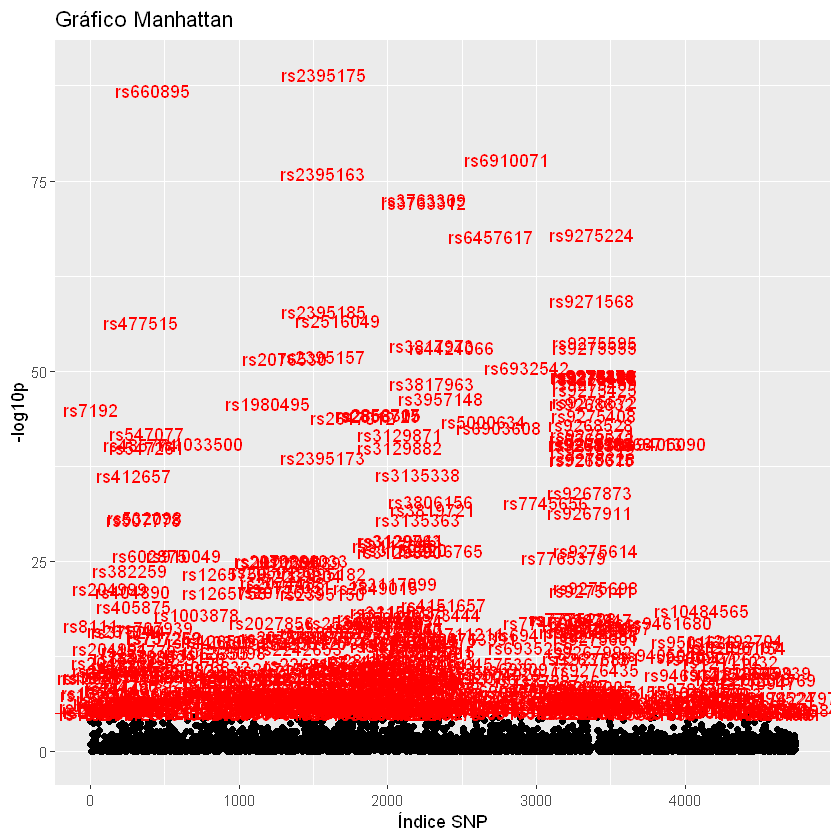

In [31]:
bfLimit = -log10 ( 0.05 / nrow ( infosDfExp ) )
infosDfExp %>% ggplot ( ) + 
geom_point ( data = subset ( infosDfExp , escalaManhattan < bfLimit ) , aes ( x = Ord , y = escalaManhattan ) ) +
geom_hline ( yintercept = bfLimit , col = "red" ) +
geom_text( data = subset ( infosDfExp , escalaManhattan > bfLimit ) , aes ( Ord , escalaManhattan , label = snpName ) , col = "red") +
labs ( x = "Índice SNP" , y = "-log10p" , title = "Gráfico Manhattan" )

In [32]:
print ( paste0 ( "Temos que " , sum ( infosDfExp$escalaManhattan > bfLimit ) , " em " , nrow(infosDfExp) ,
               ", isto é, ", 100 * round ( sum ( infosDfExp$escalaManhattan > bfLimit ) / nrow(infosDfExp) , 4 ) ,
                "% dos snps possuem significância estatística considerando o critério selecionado"
               )  )

[1] "Temos que 503 em 4743, isto é, 10.61% dos snps possuem significância estatística considerando o critério selecionado"


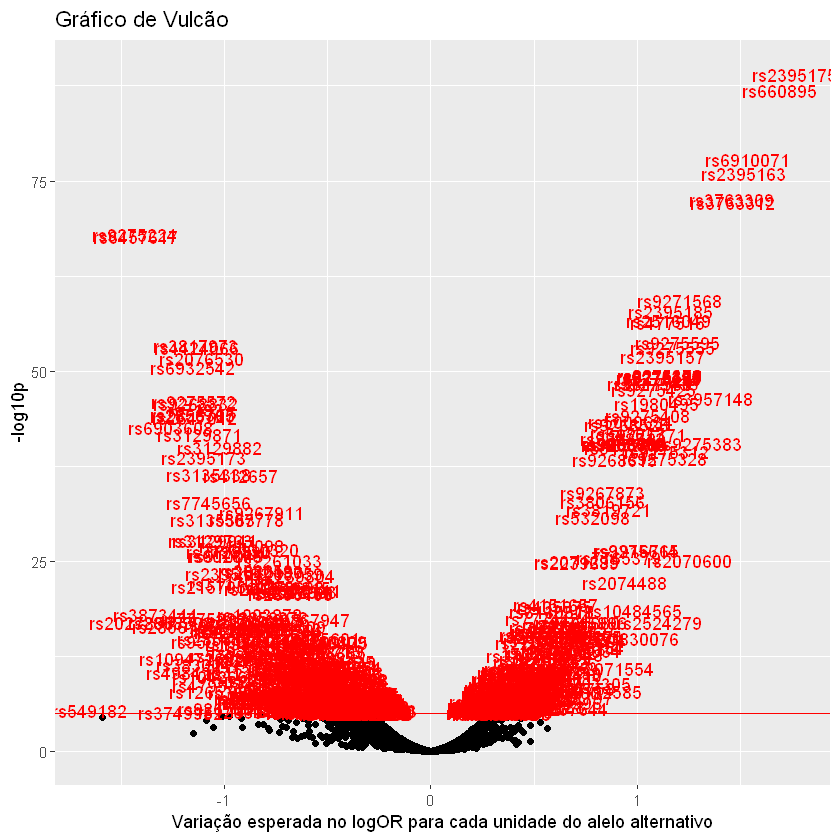

In [33]:
bfLimit = -log10 ( 0.05 / nrow ( infosDfExp ) )
infosDfExp %>% ggplot ( ) + 
geom_point ( data = subset ( infosDfExp , escalaManhattan < bfLimit ) , aes ( x = beta , y = escalaManhattan ) ) +
geom_hline ( yintercept = bfLimit , col = "red" ) +
geom_text( data = subset ( infosDfExp , escalaManhattan > bfLimit ) , aes ( beta , escalaManhattan , label = snpName ) , col = "red") +
labs ( x = "Variação esperada no logOR para cada unidade do alelo alternativo" , y = "-log10p" , title = "Gráfico de Vulcão" )

In [34]:
print ( paste0 ( "Temos que " , sum ( infosDfExp$escalaManhattan > bfLimit & infosDfExp$beta > 0 ) ,
                " snp's possuem beta > 0 e que " , 
               sum ( infosDfExp$escalaManhattan > bfLimit & infosDfExp$beta < 0 ) ,
                " snp's possuem beta < 0"
               )  )

[1] "Temos que 218 snp's possuem beta > 0 e que 285 snp's possuem beta < 0"


**Conclusão:** A partir das análises feitas sobre modelos com apenas 1 grau de liberdade e levando-se em consideração a correção de Bonferroni, nota-se que há 503 SNP's com efeito estatisticamente siginificante, dos quais em 218 deles a quantidade de alelos alternativos aumenta a chance de se ter artrite reumatóide em relação ao genótipo de referência, enquanto que o efeito é o oposto para 285 snp's.

**b)** Considere todos os 5 arquivos com dados de genótipos de SNPs. Padronize esses dados,
subtraindo a média e dividindo pelo desvio padrão, e obtenha os dois primeiros Componentes
Principais (CP). Usando esses CP, construa um gráfico de dispersão dos 2062 indivíduos.
Identifique os grupos caso e controle. Os CP discriminam os indivíduos? Comente.

In [35]:
dfPadronizado = mergeDf
dfPadronizado[ , snpNames ] = scale ( dfPadronizado[ , snpNames ] )
dfPadronizado %>% head ( 5 )

,ID2,ID,Affection,Sex,DRB1_1,DRB1_2,SENum,SEStatus,AntiCCP,RFUW,...,rs16890428,rs10807192,rs742538,rs10456462,rs13206817,rs1931765,rs12214213,rs4299828,rs12176364,rs6458047
,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,D0024949,0,F,0,1,2,yes,NA,NA,...,2.5129715,-1.2676895,0.3739146,0.8569724,-1.2573422,-0.704084,-1.2538545,-0.7048728,-0.4264573,-0.703887
2,2,D0024302,0,F,0,0,1,yes,NA,NA,...,-0.3564104,1.6085338,-1.0821611,-0.8195714,1.6209784,-0.704084,1.6259390,-0.7048728,-0.4264573,-0.703887
3,3,D0023151,0,F,0,0,1,yes,NA,NA,...,-0.3564104,0.1704222,0.3739146,-0.8195714,1.6209784,-0.704084,1.6259390,-0.7048728,-0.4264573,-0.703887
4,4,D0022042,0,F,0,0,1,yes,NA,NA,...,-0.3564104,0.1704222,-1.0821611,0.8569724,-1.2573422,1.038799,-1.2538545,NA,-0.4264573,1.041854
5,5,D0021275,0,F,0,0,1,yes,NA,NA,...,-0.3564104,0.1704222,0.3739146,0.8569724,0.1818181,-0.704084,0.1860422,-0.7048728,-0.4264573,-0.703887


In [36]:
nenhum_na <- function(x) !any(is.na(x))
PCdf = dfPadronizado[ , snpNames ] %>% select_if ( nenhum_na )
colunasRestantes = colnames ( PCdf )

In [37]:
print ( paste0 ( "Temos " , length ( colunasRestantes ) , " snps com preenchimento completo" ) )
matrizCov = cov( PCdf )
decomp = eigen ( matrizCov )
rownames ( decomp$vectors ) = colnames ( matrizCov )

[1] "Temos 1279 snps com preenchimento completo"


[1] "Os dois primeiros componentes principais representam 5.25% da variância total dos dados que não possuem informações faltantes"


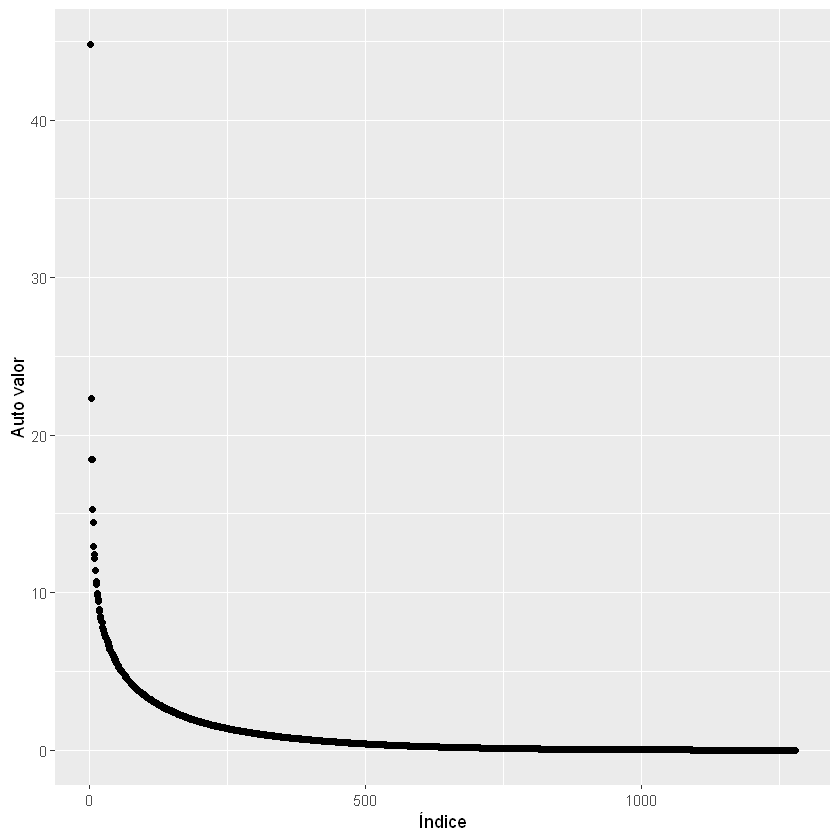

In [38]:
decomp$values %>% as.data.frame ( ) %>%
rename ( "autoValores" = "." ) %>% 
mutate ( order = 1 : n() ) %>% 
ggplot ( ) + geom_point ( aes ( x = order ,  y = autoValores ) ) + 
labs ( x = "Índice" , y = "Auto valor" , "Gráfico de autovalores" )

print ( paste0 ( "Os dois primeiros componentes principais representam " , 
                100*round ( sum ( decomp$values[1:2] ) / sum ( decomp$values ) , 4) ,
               "% da variância total dos dados que não possuem informações faltantes") )

In [39]:
dfParaGrafico = dfPadronizado [ , c ( "ID" , "Affection" , colunasRestantes ) ]
matrizCalculo = as.matrix ( dfParaGrafico [ , colunasRestantes ] , ncol = length ( colunasRestantes ) )
rownames ( matrizCalculo ) = dfPadronizado$ID

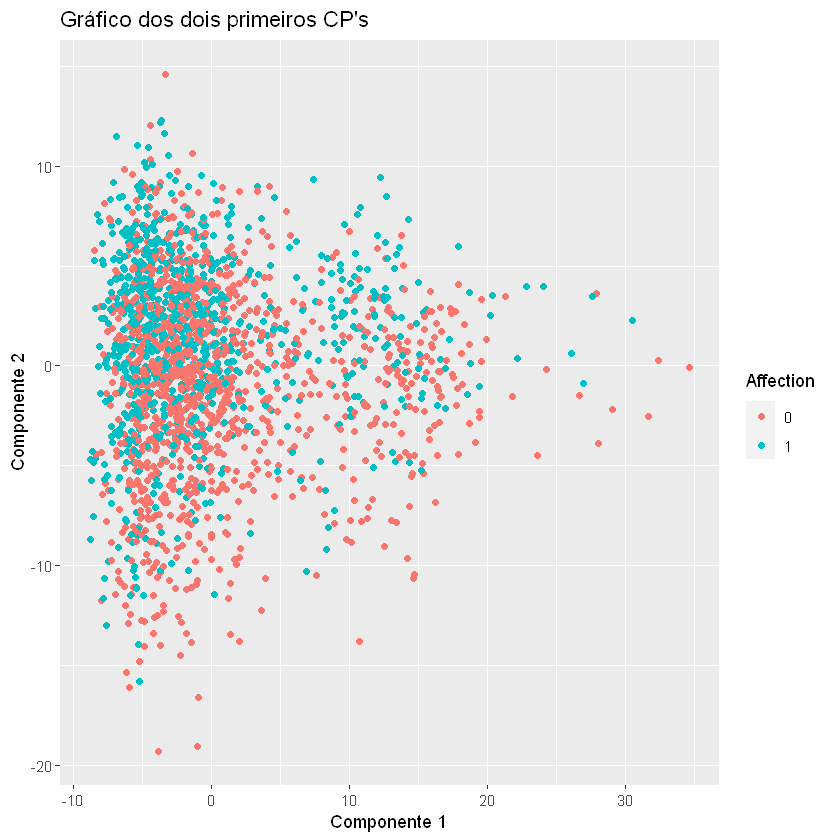

In [40]:
dfParaGrafico$PC1 = matrizCalculo %*% decomp$vectors[,1]
dfParaGrafico$PC2 = matrizCalculo %*% decomp$vectors[,2]

dfParaGrafico %>% ggplot ( aes ( x = PC1 , y = PC2 , col = as.factor ( Affection ) ) ) +
geom_point ( ) +
labs ( x = "Componente 1" , y = "Componente 2" , col = "Affection" , title = "Gráfico dos dois primeiros CP's" )

**Conclusão** Após padronizar os dados e fazer a análise de componentes principais, conclui-se que os CP não discriminam os indivíduos nas duas primeiras dimensões.

**c)** Ajuste modelos de regressão logística usando os dois primeiros CP como covariáveis além
do sexo dos indivíduos. Construa os gráficos Manhattan e Vulcão. Há SNPs significantes?

In [41]:
dfMergePcs = merge ( mergeDf , dfParaGrafico [ , c ( "ID" , "PC1" , "PC2" )] , by = "ID" )

infoRelevantePt2 = NULL

for ( snp in snpNames ){
    
# Modelo aditivo
    mergeFilt = dfMergePcs [ !(is.na ( dfMergePcs$Affection ) ) & !( is.na ( dfMergePcs[ , snp ] ) ) ,  ]
    modeloAdit = glm ( mergeFilt$Affection ~ mergeFilt$PC1 + mergeFilt$PC2 + mergeFilt$Sex + mergeFilt[ , snp ] , family = binomial ( link = "logit" ) )
    tabelaResumoAdit = summary ( modeloAdit )
    
    infoRelevantePt2 = rbind ( infoRelevantePt2 , c ( snp , tabelaResumoAdit$coefficients[ 5 , 1 ] , tabelaResumoAdit$coefficients[ 5 , 4 ] ) )
    
}
infosDfPt2 = infoRelevantePt2 %>% as.data.frame ( )
infosDfPt2 %>% head ( 5 )

,V1,V2,V3
,<fct>,<fct>,<fct>
1,rs1033955,-0.153959365430042,0.0231349078774273
2,rs17658803,-0.134619308305007,0.198008109974658
3,rs13196368,0.200348472865067,0.00267890801796891
4,rs834362,-0.211441694189861,0.00298304276653166
5,rs10484378,-0.081045174462626,0.517191258974479


In [42]:
infosDfExpPt2 = infosDfPt2 %>% 
mutate ( snpName = as.character ( V1 ) , beta = as.numeric ( as.character ( V2 ) ) , valorP = as.numeric ( as.character ( V3 ) ) , tam = nchar ( as.character ( V1 ) ) ) %>% 
select ( snpName , beta , valorP , tam ) %>% 
arrange ( tam , snpName ) %>% 
mutate ( Ord = 1:nrow ( infosDf ) , escalaManhattan = -log10 ( valorP ) , chr = 6 ) %>% 
arrange ( -escalaManhattan )

infosDfExpPt2 %>% head ( 5 )

,snpName,beta,valorP,tam,Ord,escalaManhattan,chr
,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,rs2395175,1.669818,2.648721e-72,9,1573,71.57696,6
2,rs660895,1.609107,6.920245e-70,8,425,69.15988,6
3,rs6910071,1.426435,1.020792e-59,9,2806,58.99106,6
4,rs2395163,1.409637,9.862716e-58,9,1570,57.00600,6
5,rs3763309,1.346450,1.026304e-53,9,2249,52.98872,6


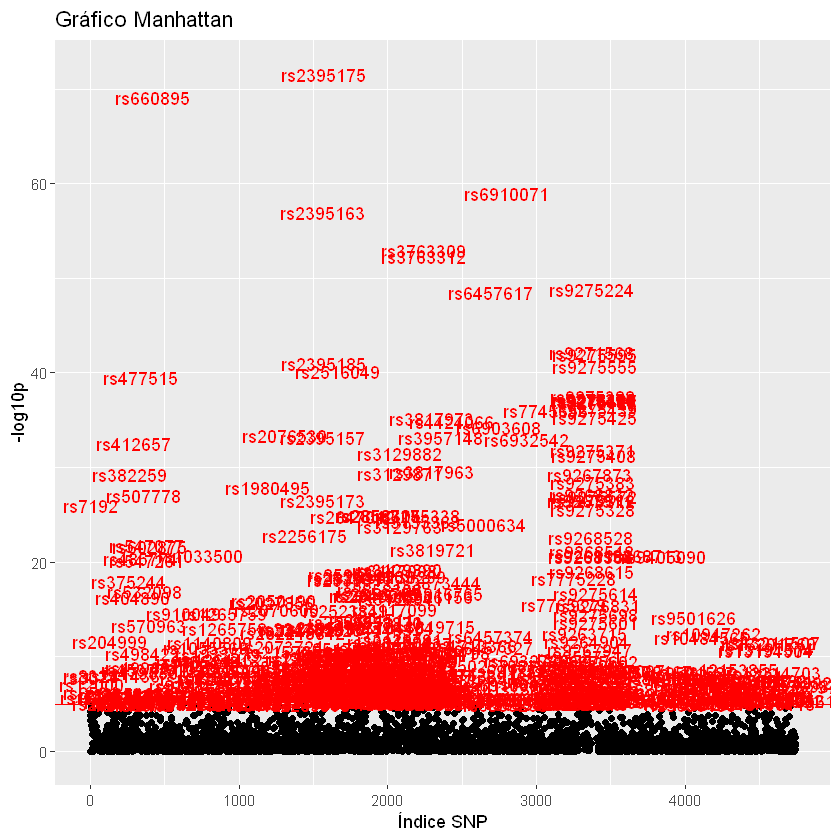

In [43]:
bfLimit = -log10 ( 0.05 / nrow ( infosDfExpPt2 ) )
infosDfExpPt2 %>% ggplot ( ) + 
geom_point ( data = subset ( infosDfExpPt2 , escalaManhattan < bfLimit ) , aes ( x = Ord , y = escalaManhattan ) ) +
geom_hline ( yintercept = bfLimit , col = "red" ) +
geom_text( data = subset ( infosDfExpPt2 , escalaManhattan > bfLimit ) , aes ( Ord , escalaManhattan , label = snpName ) , col = "red") +
labs ( x = "Índice SNP" , y = "-log10p" , title = "Gráfico Manhattan" )

In [44]:
print ( paste0 ( "Temos que " , sum ( infosDfExpPt2$escalaManhattan > bfLimit ) , " em " , nrow(infosDfExpPt2) ,
               ", isto é, ", 100 * round ( sum ( infosDfExpPt2$escalaManhattan > bfLimit ) / nrow(infosDfExpPt2) , 4 ) ,
                "% dos snps possuem significância estatística considerando o critério selecionado"
               )  )

[1] "Temos que 483 em 4743, isto é, 10.18% dos snps possuem significância estatística considerando o critério selecionado"


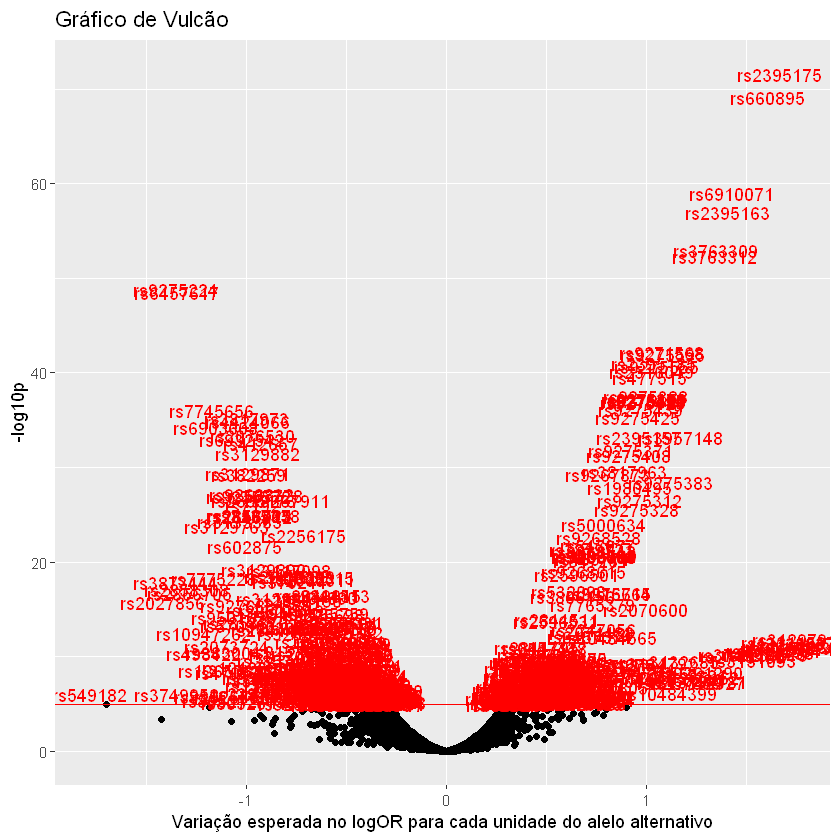

In [45]:
bfLimit = -log10 ( 0.05 / nrow ( infosDfExpPt2 ) )
infosDfExpPt2 %>% ggplot ( ) + 
geom_point ( data = subset ( infosDfExpPt2 , escalaManhattan < bfLimit ) , aes ( x = beta , y = escalaManhattan ) ) +
geom_hline ( yintercept = bfLimit , col = "red" ) +
geom_text( data = subset ( infosDfExpPt2 , escalaManhattan > bfLimit ) , aes ( beta , escalaManhattan , label = snpName ) , col = "red") +
labs ( x = "Variação esperada no logOR para cada unidade do alelo alternativo" , y = "-log10p" , title = "Gráfico de Vulcão" )

In [46]:
print ( paste0 ( "Temos que " , sum ( infosDfExpPt2$escalaManhattan > bfLimit & infosDfExpPt2$beta > 0 ) ,
                " snp's possuem beta > 0 e que " , 
               sum ( infosDfExpPt2$escalaManhattan > bfLimit & infosDfExpPt2$beta < 0 ) ,
                " snp's possuem beta < 0"
               )  )

[1] "Temos que 210 snp's possuem beta > 0 e que 273 snp's possuem beta < 0"


**Conclusão:** A partir das análises feitas sobre modelos com apenas 1 grau de liberdade e levando-se em consideração a correção de Bonferroni, nota-se que há 483 SNP's com efeito estatisticamente siginificante, dos quais em 210 deles a quantidade de alelos alternativos aumenta a chance de se ter artrite reumatóide em relação ao genótipo de referência, enquanto que o efeito é o oposto para 273 snp's.

**d)** Compare os resultados dos modelos de regressão logística ajustados em a) e c).

In [47]:
mergeAll = merge ( infosDfExp , infosDfExpPt2 , by = "snpName" )
head ( mergeAll )

,snpName,beta.x,valorP.x,tam.x,Ord.x,escalaManhattan.x,chr.x,beta.y,valorP.y,tam.y,Ord.y,escalaManhattan.y,chr.y
,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,rs1000308,0.366936278,1.009443e-02,9,718,1.9959180,6,-0.01721035,9.084247e-01,9,718,0.04171105,6
2,rs1001310,-0.031434512,6.376290e-01,9,719,0.1954319,6,-0.00558355,9.356856e-01,9,719,0.02887006,6
3,rs1002985,-0.592212460,3.312802e-04,9,720,3.4798045,6,-0.34623753,4.357181e-02,9,720,1.36079436,6
4,rs1003581,-0.220090292,1.455909e-02,9,721,1.8368656,6,-0.15855295,8.615179e-02,9,721,1.06473571,6
5,rs1003878,-0.825211255,8.562159e-19,9,722,18.0674167,6,-0.64885157,8.254618e-10,9,722,9.08330302,6
6,rs1003979,-0.003614587,9.551560e-01,9,723,0.0199257,6,0.09851357,1.446064e-01,9,723,0.83981239,6


In [48]:
# Os mesmos snps se mantiveram estatisticamente significantes?
mergeAll = mergeAll %>% mutate ( signifSimples = ifelse ( escalaManhattan.x > bfLimit , "signifSimples" , "NSignifSimples" ) , signifCompleto = ifelse ( escalaManhattan.y > bfLimit , "signifCompleto" , "NSignifCompleto" ) )
table ( mergeAll$signifSimples , mergeAll$signifCompleto )

                
                 NSignifCompleto signifCompleto
  NSignifSimples            4058            182
  signifSimples              202            301

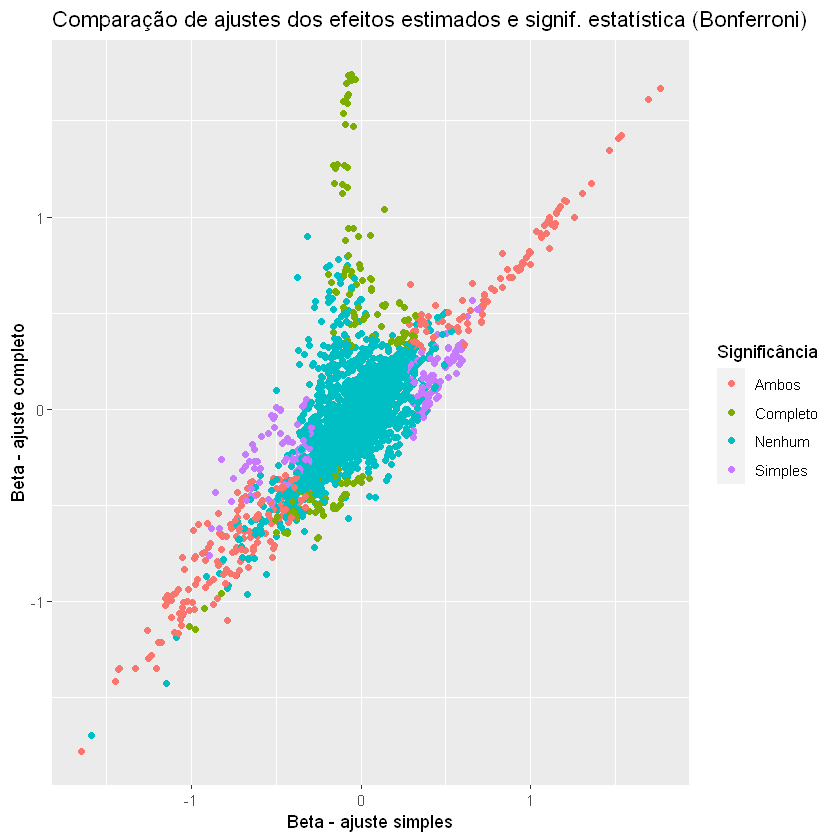

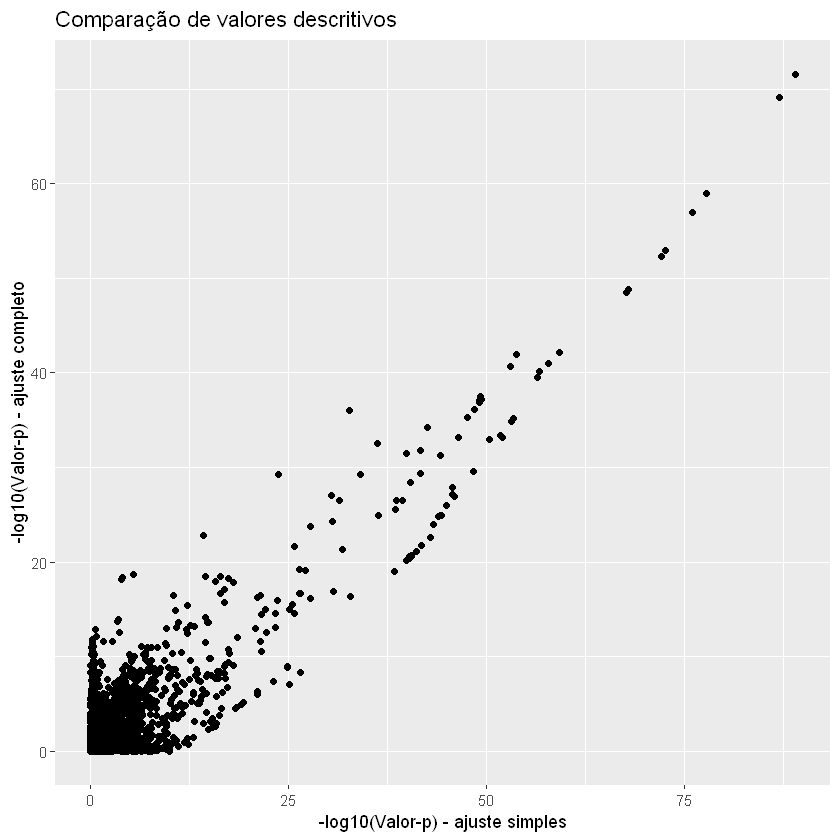

In [50]:
# Como se dão as relações entre os valores-p e os betas?
mergeAll = mergeAll %>% mutate ( signifConjunta = ifelse ( escalaManhattan.x > bfLimit & escalaManhattan.y > bfLimit , "Ambos",
                                                         ifelse ( escalaManhattan.x > bfLimit , "Simples" ,
                                                                 ifelse ( escalaManhattan.y > bfLimit , "Completo" , "Nenhum") ) ) )
mergeAll  %>% 
ggplot ( aes ( x = beta.x , y = beta.y , colour = signifConjunta ) ) +
geom_point ( ) +
labs ( x = "Beta - ajuste simples" , y = "Beta - ajuste completo" , title = "Comparação de ajustes dos efeitos estimados e signif. estatística (Bonferroni)" , colour = "Significância" )

mergeAll  %>% 
ggplot ( aes ( x = escalaManhattan.x , y = escalaManhattan.y ) ) +
geom_point ( ) +
labs ( x = "-log10(Valor-p) - ajuste simples" , y = "-log10(Valor-p) - ajuste completo" , title = "Comparação de valores descritivos" )

**Conclusões:** Temos que as conclusões a respeito da significância estatística dos snps é similar para 4359 dos mesmos (301 estatisticamente significantes e 4058 não). Porém no modelo simples (sem demais covariáveis) temos que 202 snps foram dados como significantes enquanto no modelo completo (covariáveis de sexo e primeiros dois CP's acrescentadas) foram dados como não significantes. O mesmo fenômeno ocorre com 182 snps, do modelo completo em relação ao modelo simples. Já a respeito da relação entre as estimativas dos efeitos para cada unidade alélica de cada snp sobre a chance de se ter a artrite reumatóide, e sobre seus valores descritivos, pode-se observar que:

* existe uma tendência dos $\beta$'s estimados serem próximos e cuja significância estatística, levando-se em consideração o método de Bonferroni para comparações múltiplas, é similar (reta principal);
* nas redondezas das estimativas de $\beta$ próximas de 0 do modelo simples, existe uma nuvem de pontos em que $\beta$'s do modelo completo são positivos e estatisticamente significantes (levando-se em conta a correção para múltiplos testes);
* Existe uma tendência dos valores-p estimados serem próximos (reta principal no segundo gráfico).